In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch          
import torch.nn as nn             #Build model
import torch.nn.functional as F
import torch.optim as optim #training strategy
from torch.utils.data import DataLoader  #split data
import torchvision.datasets as datasets  #load data 
import torchvision.transforms as transforms  #transform data

In [3]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
input_size=784
n_classes=10
learning_rate=0.001
batch_size=64
n_epochs=20

In [5]:
FashionMNIST_traindataset=datasets.FashionMNIST(root='/content/drive/MyDrive/Python/data/FashionMNIST',train=True,transform=transforms.ToTensor(),download=True)
FashionMNIST_trainloader=DataLoader(dataset=FashionMNIST_traindataset, batch_size=batch_size,shuffle=True)
FashionMNIST_testdataset=datasets.FashionMNIST(root='/content/drive/MyDrive/Python/data/FashionMNIST', train=False,transform=transforms.ToTensor(),download=True)
FashionMNIST_testloader=DataLoader(dataset=FashionMNIST_testdataset, batch_size=batch_size,shuffle=False)

In [6]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic  =True
torch.backends.cudnn.benchmark=False

9

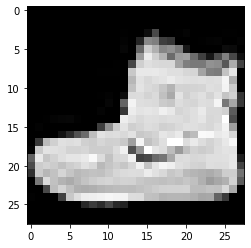

In [7]:
image, label=FashionMNIST_traindataset[0]
plt.imshow(image.squeeze(),cmap='gray')
label

**MLP**

In [8]:
class MLP(nn.Module):
    def __init__(self,input_size,n_classes):
        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(input_size,100), nn.ReLU(),
            nn.Linear(100, 100), nn.ReLU(),
            nn.Linear(100,50), nn.ReLU(),
            nn.Linear(50,25), nn.ReLU(),
            nn.Linear(25,n_classes), nn.Softmax(dim=1)
        )
    def forward(self, X):
        prob=self.model(X)
        return prob

In [9]:
model_MLP=MLP(input_size=input_size,n_classes=n_classes).to(device)
model_MLP

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU()
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): ReLU()
    (8): Linear(in_features=25, out_features=10, bias=True)
    (9): Softmax(dim=1)
  )
)

In [10]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_MLP.parameters(),lr=learning_rate)

In [11]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(FashionMNIST_trainloader):
        data=data.to(device)
        targets=targets.to(device)

        data=data.reshape(data.shape[0],-1)

        scores=model_MLP(data)
        loss=criterion(scores, targets)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        if (batch_idx+1)%100==0:
            print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1},Loss: {loss.item():.2f}')

Epoch 1/20, Batch 100,Loss: 1.98
Epoch 1/20, Batch 200,Loss: 1.81
Epoch 1/20, Batch 300,Loss: 1.81
Epoch 1/20, Batch 400,Loss: 1.80
Epoch 1/20, Batch 500,Loss: 1.87
Epoch 1/20, Batch 600,Loss: 1.83
Epoch 1/20, Batch 700,Loss: 1.80
Epoch 1/20, Batch 800,Loss: 1.89
Epoch 1/20, Batch 900,Loss: 1.76
Epoch 2/20, Batch 100,Loss: 1.76
Epoch 2/20, Batch 200,Loss: 1.88
Epoch 2/20, Batch 300,Loss: 1.84
Epoch 2/20, Batch 400,Loss: 1.79
Epoch 2/20, Batch 500,Loss: 1.71
Epoch 2/20, Batch 600,Loss: 1.71
Epoch 2/20, Batch 700,Loss: 1.72
Epoch 2/20, Batch 800,Loss: 1.72
Epoch 2/20, Batch 900,Loss: 1.64
Epoch 3/20, Batch 100,Loss: 1.74
Epoch 3/20, Batch 200,Loss: 1.74
Epoch 3/20, Batch 300,Loss: 1.71
Epoch 3/20, Batch 400,Loss: 1.69
Epoch 3/20, Batch 500,Loss: 1.77
Epoch 3/20, Batch 600,Loss: 1.60
Epoch 3/20, Batch 700,Loss: 1.60
Epoch 3/20, Batch 800,Loss: 1.70
Epoch 3/20, Batch 900,Loss: 1.66
Epoch 4/20, Batch 100,Loss: 1.65
Epoch 4/20, Batch 200,Loss: 1.66
Epoch 4/20, Batch 300,Loss: 1.73
Epoch 4/20

In [12]:
def get_accuracy(loader_FashionMNIST,model_MLP):
    if loader_FashionMNIST.dataset.train:
        print("Getting accuracy on training data.")
    else:
        print("Getting accuracy on testing data")
    n_corrects=0
    n_samples=0
    model_MLP.eval()

    with torch.no_grad():
        for x,y in loader_FashionMNIST:
            x=x.to(device)
            y=y.to(device)
            x=x.reshape(x.shape[0],-1)

            scores=model_MLP(x)
            _, y_pred=scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model_MLP.train()

In [14]:
get_accuracy(FashionMNIST_trainloader,model_MLP)
get_accuracy(FashionMNIST_testloader,model_MLP)

Getting accuracy on training data.
We got 52664/60000 correct. Accuracy = 87.77
Getting accuracy on testing data
We got 8604/10000 correct. Accuracy = 86.04


**LeNet**

In [15]:
class LeNet5(nn.Module):
  def __init__(self, n_classes):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2),
        nn.Conv2d(in_channels=16, out_channels=120, kernel_size=4, stride=1),
        nn.Tanh(),
        nn.Flatten(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=n_classes),
        nn.Softmax(dim=1)
    )
  
  def forward(self, X):
    prob = self.model(X)
    return prob

In [17]:
model_LeNet=LeNet5(n_classes=n_classes).to(device)
print(model_LeNet)

LeNet5(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(4, 4), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_LeNet.parameters(), lr=learning_rate)

In [19]:
for epoch in range(n_epochs):
    for batch_idx, (data, targets) in enumerate(FashionMNIST_trainloader):
        data=data.to(device)
        targets=targets.to(device)

        scores=model_LeNet(data)
        loss=criterion(scores, targets)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        
        if (batch_idx+1)%100==0:
            print(f'Epoch {epoch+1}/{n_epochs}, Batch {batch_idx+1},Loss: {loss.item():.2f}')

Epoch 1/20, Batch 100,Loss: 1.95
Epoch 1/20, Batch 200,Loss: 1.86
Epoch 1/20, Batch 300,Loss: 1.76
Epoch 1/20, Batch 400,Loss: 1.71
Epoch 1/20, Batch 500,Loss: 1.65
Epoch 1/20, Batch 600,Loss: 1.62
Epoch 1/20, Batch 700,Loss: 1.66
Epoch 1/20, Batch 800,Loss: 1.68
Epoch 1/20, Batch 900,Loss: 1.67
Epoch 2/20, Batch 100,Loss: 1.77
Epoch 2/20, Batch 200,Loss: 1.65
Epoch 2/20, Batch 300,Loss: 1.75
Epoch 2/20, Batch 400,Loss: 1.66
Epoch 2/20, Batch 500,Loss: 1.64
Epoch 2/20, Batch 600,Loss: 1.73
Epoch 2/20, Batch 700,Loss: 1.72
Epoch 2/20, Batch 800,Loss: 1.75
Epoch 2/20, Batch 900,Loss: 1.68
Epoch 3/20, Batch 100,Loss: 1.63
Epoch 3/20, Batch 200,Loss: 1.64
Epoch 3/20, Batch 300,Loss: 1.69
Epoch 3/20, Batch 400,Loss: 1.68
Epoch 3/20, Batch 500,Loss: 1.62
Epoch 3/20, Batch 600,Loss: 1.66
Epoch 3/20, Batch 700,Loss: 1.65
Epoch 3/20, Batch 800,Loss: 1.66
Epoch 3/20, Batch 900,Loss: 1.66
Epoch 4/20, Batch 100,Loss: 1.70
Epoch 4/20, Batch 200,Loss: 1.70
Epoch 4/20, Batch 300,Loss: 1.68
Epoch 4/20

In [26]:
def get_accuracy(FashionMNIST_trainloader,model_LeNet):
    if FashionMNIST_trainloader.dataset.train:
        print("Getting accuracy on training data.")
    else:
        print("Getting accuracy on testing data")
        
    n_corrects=0
    n_samples=0
    model_LeNet.eval()

    with torch.no_grad():
        for x,y in FashionMNIST_trainloader:
            x = x.to(device)
            y = y.to(device)

            scores=model_LeNet(x)
            _, y_pred=scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'We got {n_corrects}/{n_samples} correct. Accuracy = {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model_LeNet.train()

In [27]:
get_accuracy(FashionMNIST_trainloader, model_LeNet)
get_accuracy(FashionMNIST_testloader, model_LeNet)

Getting accuracy on training data.
We got 53674/60000 correct. Accuracy = 89.46
Getting accuracy on testing data
We got 8668/10000 correct. Accuracy = 86.68
